## **1.Getting started with the essential libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,classification_report

from sklearn.decomposition import PCA

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

import joblib

In [ ]:
# Load the dataset
dataset = pd.read_csv('crop_dataset.csv')

In [ ]:
# Explore the dataset
dataset.head(15)

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,1712.196283,5.317804,wheat,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,1748.595734,5.427834,wheat,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,1893.744627,5.579595,wheat,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,2123.482908,5.496611,wheat,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,1642.720357,5.574878,wheat,0
5,69,37,42,23.058049,83.370118,7.073454,251.055000,148,1922.352236,5.529647,wheat,0
6,69,55,38,22.708838,82.639414,5.700806,271.324860,162,1876.645062,5.606996,wheat,0
7,94,53,40,20.277744,82.894086,5.718627,241.974195,187,1680.905027,5.492955,wheat,0
8,89,54,38,24.515881,83.535216,6.685346,230.446236,181,2047.939394,5.444348,wheat,0
9,68,58,38,23.223974,83.033227,6.336254,221.209196,164,1928.361491,5.403619,wheat,0


## **2.Data Analysis(EDA)**

EDA, which stands for Exploratory Data Analysis, is an essential step in the data analysis process. It involves examining and understanding the structure, patterns, and characteristics of the data before applying any formal statistical techniques or building predictive models. EDA plays a crucial role in gaining insights, identifying patterns, and forming hypotheses about the data.

Here are some key reasons why EDA is important:

Data Understanding: EDA helps in developing a deep understanding of the data. It allows you to become familiar with the variables, their types, and the relationships between them. By exploring the data visually and numerically, you can identify any inconsistencies, missing values, outliers, or unusual patterns that may need to be addressed.

Data Quality Assessment: EDA helps in assessing the quality of the data. You can check for data integrity issues, such as missing values, duplicate records, or data entry errors. By identifying and addressing these issues early on, you can ensure the reliability and accuracy of your analyses.

Pattern Recognition: EDA helps in identifying patterns and trends within the data. By visualizing the data using various techniques like histograms, scatter plots, box plots, and heatmaps, you can uncover relationships between variables, detect outliers, and understand the distribution and central tendencies of the data. These insights can guide further analysis and modeling decisions.

Feature Selection: EDA aids in selecting relevant features or variables for analysis. By examining the relationships between variables and their impact on the target variable, you can identify the most influential features. This helps in reducing dimensionality and improving the efficiency and interpretability of models.

Hypothesis Generation: EDA facilitates the generation of hypotheses or initial assumptions about the data. By exploring different aspects of the data and observing patterns, you can formulate hypotheses that can be tested and validated through further analysis or experiments.

Decision Making: EDA provides insights that aid in decision-making processes. It helps in understanding the data-driven context and guides you in making informed choices about data transformations, model selection, outlier treatment, and feature engineering.

Overall, EDA serves as a critical foundation for any data analysis or modeling task. It helps in understanding the data, identifying issues, discovering patterns, and generating hypotheses. By investing time and effort in EDA, you can make more accurate and informed decisions throughout your data analysis journey.

In [ ]:
# First thing we can notice is that the dataset has scientific names for the crops. We can replace them with their common names. so that non-agricultural people can understand the dataset better.
dataset.rename(columns={'N': 'Nitrogen'}, inplace=True)
dataset.rename(columns={'P': 'Phosphorus'}, inplace=True)
dataset.rename(columns={'K': 'Potassium'}, inplace=True)
dataset.rename(columns={'ph': 'PH value of the soil'}, inplace=True)

In [ ]:
# check if the Label columns and Label_Encoded column are encoded correctly
dataset['Label'].value_counts()
dataset['Label_Encoded'].value_counts()

# Extract the encoding array
label_encodings = dataset[['Label', 'Label_Encoded']].drop_duplicates().sort_values('Label_Encoded')
label_encodings

# Now check each record with the array of encoding
dataset[['Label', 'Label_Encoded']].head(15)

,Label,Label_Encoded
0,wheat,0
1,wheat,0
2,wheat,0
3,wheat,0
4,wheat,0
5,wheat,0
6,wheat,0
7,wheat,0
8,wheat,0
9,wheat,0


With the above result we can jump into the conclusion that the dataset is labelled correctly and we can delete the unwanted Label column.

In [ ]:
# Delete the Label column
dataset.drop('Label', axis=1, inplace=True)

In [ ]:
# Let's check for missing values
dataset.isnull().sum()

Nitrogen                0
Phosphorus              0
Potassium               0
temperature             0
humidity                0
PH value of the soil    0
rainfall                0
Total_Nutrients         0
Temperature_Humidity    0
Log_Rainfall            0
Label_Encoded           0
dtype: int64

With the above output, we can see that there are no missing values in the dataset.  So we can proceed to the next step.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nitrogen              2200 non-null   int64  
 1   Phosphorus            2200 non-null   int64  
 2   Potassium             2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   PH value of the soil  2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Total_Nutrients       2200 non-null   int64  
 8   Temperature_Humidity  2200 non-null   float64
 9   Log_Rainfall          2200 non-null   float64
 10  Label_Encoded         2200 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 189.2 KB


In [ ]:
# Lets check for percentage of outliers in the numerical columns
dataset.describe()
for column in dataset.columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print('Percentage Outliers in', column, dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)].shape[0]/len(dataset))

Percentage Outliers in Nitrogen 0.0
Percentage Outliers in Phosphorus 0.06272727272727273
Percentage Outliers in Potassium 0.09090909090909091
Percentage Outliers in temperature 0.03909090909090909
Percentage Outliers in humidity 0.013636363636363636
Percentage Outliers in PH value of the soil 0.02590909090909091
Percentage Outliers in rainfall 0.045454545454545456
Percentage Outliers in Total_Nutrients 0.09090909090909091
Percentage Outliers in Temperature_Humidity 0.04318181818181818
Percentage Outliers in Log_Rainfall 0.019090909090909092
Percentage Outliers in Label_Encoded 0.0


There are a small percentage of outliers in the dataset. also in the context of agriculture, outliers are important as they can be a result of some disease or pest attack. So removing them might be a loss of information.So we will keep the outliers as it is.

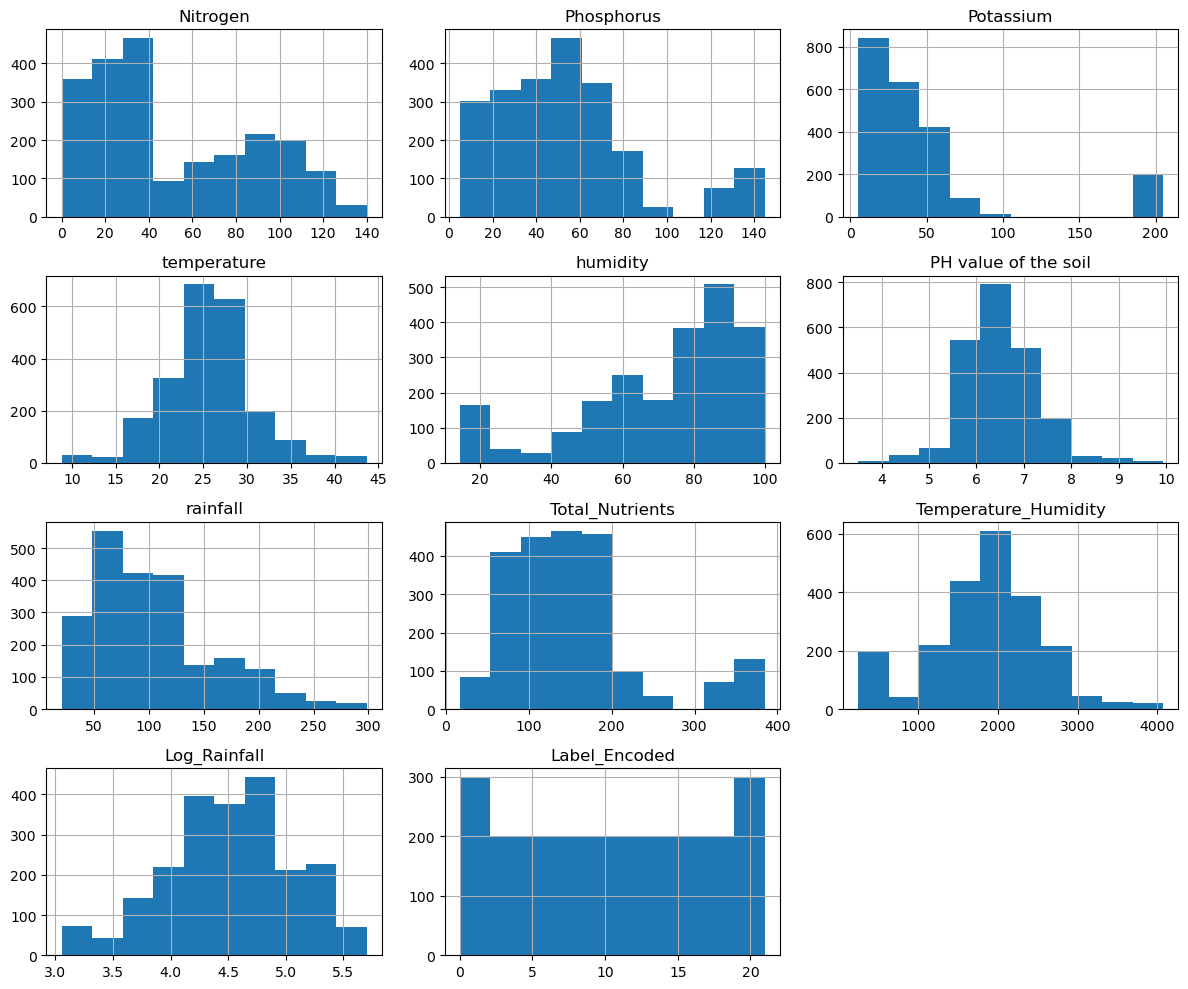

In [ ]:
# Histograms for numerical features to understand the distribution of the data
numerical_features = dataset.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

<Axes: xlabel='Label_Encoded', ylabel='count'>

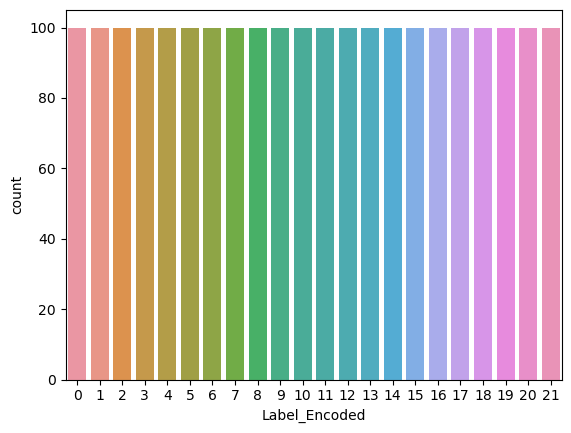

In [ ]:
# Let's check the distribution of the target variable 'LabelEncoded'
sns.countplot(x = 'Label_Encoded', data = dataset)

As we can see from the above output, the dataset is well balanced so we don't need to perform any resampling techniques. because the dataset is already balanced. There won't be any bias in the model due to the imbalance in the dataset.

In [ ]:
# Let's see the Statistical Summary of the dataset
dataset.describe()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,PH value of the soil,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label_Encoded
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,152.063636,1854.231566,4.508730,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,79.918669,699.366334,0.545400,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,17.000000,247.613182,3.054533,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,94.000000,1479.558114,4.182839,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,146.000000,1927.883340,4.562968,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,179.000000,2255.752423,4.830451,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,385.000000,4073.159566,5.702315,21.000000


<Axes: >

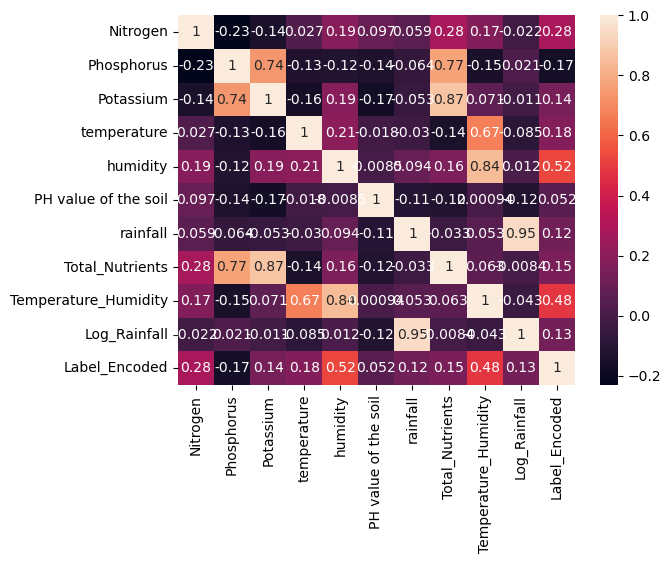

In [ ]:
# Lets see the correlation between the features and drop the highly correlated features so that the model can be more generalized
correlation = dataset.corr()
sns.heatmap(correlation, annot=True)

Here we can see the rainfall and Log_Rainfall are highly correlated with each other. So we can drop either Rainfall or Log_Rainfall. We will drop Log_Rainfall as it is good to have the original data. and here we assume that the its relation with the target variable is mostlikely linear.

In [ ]:
# Drop the Log_Rainfall column as it is highly correlated with the Rainfall column
dataset.drop('Log_Rainfall', axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nitrogen              2200 non-null   int64  
 1   Phosphorus            2200 non-null   int64  
 2   Potassium             2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   PH value of the soil  2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Total_Nutrients       2200 non-null   int64  
 8   Temperature_Humidity  2200 non-null   float64
 9   Label_Encoded         2200 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 172.0 KB


In [ ]:
# Lets check the correlation between Total_Nutrients column and total of the individual Nutrients columns
Accuracy_of_the_total = dataset['Nitrogen'] + dataset['Phosphorus'] + dataset['Potassium']
print(f'Accuracy of the total: {Accuracy_of_the_total.corr(dataset["Total_Nutrients"])}\n')

# Lets check the correlation between the individual Nutrients columns and the Total_Nutrients column
for column in ['Nitrogen', 'Phosphorus', 'Potassium']:
    print(column, dataset[column].corr(dataset['Total_Nutrients']))


Accuracy of the total: 0.9999999999999998

Nitrogen 0.2773544875456759
Phosphorus 0.7724058862823372
Potassium 0.8727107001219869


Here we can see the total_Nutrients column has a minor arithmetic error. also the individual columns are not well correlated with the total_Nutrients column. So we can drop the total_Nutrients column. becuase it is not adding any value to the model. and it's better to keep the orogiinal data.

In [ ]:
# Drop the Total_Nutrients column
dataset.drop('Total_Nutrients', axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nitrogen              2200 non-null   int64  
 1   Phosphorus            2200 non-null   int64  
 2   Potassium             2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   PH value of the soil  2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Temperature_Humidity  2200 non-null   float64
 8   Label_Encoded         2200 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 154.8 KB


The difference between "humidity" and "temperature_humidity" likely lies in their definitions

Humidity: This is a measure of the amount of water vapor present in the air. It indicates the moisture content in the atmosphere.
Temperature_Humidity: This term seems to imply a combination of temperature and humidity or a specific measure that integrates both factors. It might represent a derived or calculated metric that incorporates both temperature and humidity data.

The correlation between "humidity" and "temperature_humidity" is high, which suggests that they are closely related or that one is a function of the other. This could be due to the fact that both variables are influenced by similar factors, such as weather conditions, location, or time of day.

also since temperature_humidity is a derived metric, it might be redundant to include both "humidity" and "temperature_humidity" in the model. We can drop one of the columns to avoid multicollinearity and reduce the complexity of the model. We will drop temperature_humidity column as it is a derived metric.

In [ ]:
# Drop temperature_humidity index column as it is highly correlated with the Temperature column and its a synthetic column
dataset.drop('Temperature_Humidity', axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nitrogen              2200 non-null   int64  
 1   Phosphorus            2200 non-null   int64  
 2   Potassium             2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   PH value of the soil  2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Label_Encoded         2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


<Axes: >

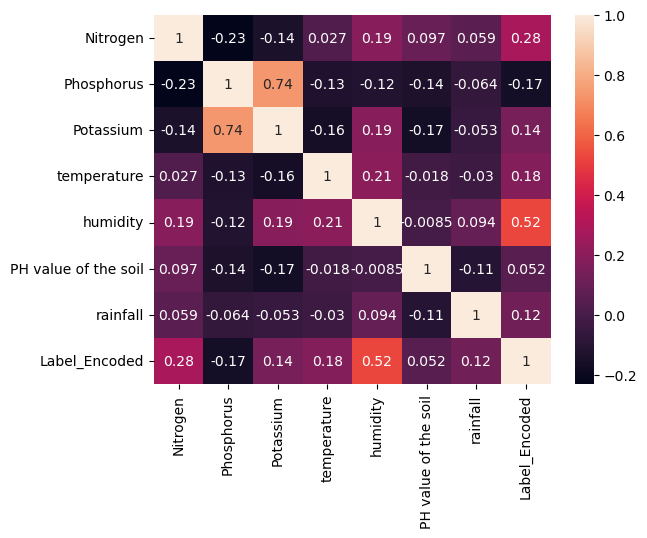

In [ ]:
#Now FInd the correlation between the features and the target variable
correlation = dataset.corr()
sns.heatmap(correlation, annot=True)

Now we can see that the dataset is ready for the model building process. We have removed the unwanted columns and the dataset is clean and ready for the model building process.

In [ ]:
dataset.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity',
       'PH value of the soil', 'rainfall', 'Label_Encoded'],
      dtype='object')

In [ ]:
# Lets do the PCA 
data_for_pca = dataset[dataset.columns]

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Apply PCA with 7 components
pca = PCA(n_components=7)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, 8)])

# Display the DataFrame with principal components
print("DataFrame after PCA:")
print(pca_df)

DataFrame after PCA:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7
0    -0.158108 -0.509036  1.405254 -1.582925  0.120831 -0.624026  1.750520
1    -0.055393 -0.477701  1.246680 -1.743835  0.892709 -1.107855  1.755227
2    -0.191210 -0.572907  1.138591 -1.783153  2.302391 -1.196847  1.818764
3    -0.614410 -0.608318  1.576953 -0.938940  1.234706 -1.241055  1.691731
4    -0.398520 -0.694957  1.324059 -2.336073  1.742456 -0.962598  1.843257
...        ...       ...       ...       ...       ...       ...       ...
2195 -1.897511  0.642566  0.579528 -1.101513  0.117820 -0.942244 -1.073359
2196 -1.799326  0.199778  0.591648 -0.373936 -0.830325 -0.385371 -1.508607
2197 -1.806938  0.691438  0.864372 -1.437285 -0.495621 -0.676708 -1.041241
2198 -1.668652  0.223671 -0.069194 -1.067381 -0.582346 -0.970777 -1.511658
2199 -1.816698  0.171671  0.190218 -1.363314 -0.300398 -0.281078 -1.295743

[2200 rows x 7 columns]


Now we can see that the dataset is ready for the model building process. We have removed the unwanted columns and the dataset is clean and ready for the model building process.

# **IMPORTANT NOTE**

About the principal components I tried to use the synthetic principal components to see if they can be used to predict the target variable. But the accuracy was lower. So I decided to drop the principal components and use the original features to predict the target variable.

## **3.Model Building**

In [ ]:
# Seperate the target variable and Features
features = dataset.drop('Label_Encoded', axis=1)
target = dataset['Label_Encoded']

In [ ]:
# Initializing empty lists to append all model's name and corresponding name
Accuracy = []
model = []

In [ ]:
# Splitting into train and test data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

#### **Decision Tree**

In [ ]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
model.append('Decision_Tree')
print("DecisionTrees's Accuracy is: ", x*100)


print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       0.00      0.00      0.00        14
           4       0.62      1.00      0.77        18
           5       0.00      0.00      0.00        19
           6       1.00      1.00      1.00        24
           7       0.59      1.00      0.74        16
           8       0.68      1.00      0.81        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00   

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Compute cross-validation score
scores = cross_val_score(DecisionTree, features, target, cv=5)

# Compute the mean of cross-validation scores
mean_score = scores.mean()

print("Cross-validation scores:", scores)
Accuracy.append(scores.mean()*100)
print("Mean of cross-validation scores:", mean_score)

joblib.dump(DecisionTree, './models/Decision_Tree.joblib')

print("Model saved to Decision_Tree.joblib")

Cross-validation scores: [0.93636364 0.90909091 0.91818182 0.85909091 0.93636364]
Mean of cross-validation scores: 0.9118181818181819
Model saved to Decision_Tree.joblib


### **Guassian Naive Bayes**

In [ ]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
model.append('Naive_Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00      1.00  

In [ ]:
# Compute cross-validation score
scores = cross_val_score(NaiveBayes, features, target, cv=5)

# Compute the mean of cross-validation scores
mean_score = scores.mean()

print("Cross-validation scores:", scores)
Accuracy.append(scores.mean()*100)
print("Mean of cross-validation scores:", mean_score)

# Save the model to a file
joblib.dump(NaiveBayes, './models/Naive_Bayes.joblib')

print("Model saved to Naive_Bayes.joblib")

Cross-validation scores: [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Mean of cross-validation scores: 0.9950000000000001
Model saved to Naive_Bayes.joblib


### **Support Vector Machine (SVM)**

### 

In [ ]:
SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.00      0.00      0.00        21
           2       1.00      0.05      0.09        21
           3       0.03      1.00      0.07        14
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        19
           6       1.00      0.12      0.22        24
           7       1.00      0.19      0.32        16
           8       0.00      0.00      0.00        23
           9       1.00      0.12      0.21        17
          10       1.00      0.24      0.38        17
          11       0.00      0.00      0.00        26
          12       1.00      0.06      0.11        18
          13       1.00      0.13      0.24        15
          14       1.00      0.30      0.47        23
          15       1.00      0.23      0.38        13
          16       1.00      0.03      0.

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Compute cross-validation score
scores = cross_val_score(SVM, features, target, cv=5)

# Compute the mean of cross-validation scores
mean_score = scores.mean()

print("Cross-validation scores:", scores)
Accuracy.append(scores.mean()*100)
print("Mean of cross-validation scores:", mean_score)

# Save the model to a file
joblib.dump(SVM, './models/SVM.joblib')

print("Model saved to SVM.joblib")

Cross-validation scores: [0.27727273 0.28863636 0.29090909 0.275      0.26818182]
Mean of cross-validation scores: 0.27999999999999997
Model saved to SVM.joblib


### **Logistic Regression**

In [ ]:
LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
model.append('Logistic_Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.90      0.86      0.88        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        18
           5       0.84      0.84      0.84        19
           6       1.00      0.96      0.98        24
           7       0.86      0.75      0.80        16
           8       0.88      1.00      0.94        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       0.96      1.00      0.98        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00   

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Compute cross-validation score
scores = cross_val_score(LogReg, features, target, cv=5)

# Compute the mean of cross-validation scores
mean_score = scores.mean()

print("Cross-validation scores:", scores)
Accuracy.append(scores.mean()*100)
print("Mean of cross-validation scores:", mean_score)

# Save the model to a file
joblib.dump(LogReg, './models/Logistic_Regression.joblib')

print("Model saved to Logistic_Regression.joblib")

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Cross-validation scores: [0.95       0.96590909 0.94772727 0.96818182 0.94318182]
Mean of cross-validation scores: 0.9550000000000001
Model saved to Logistic_Regression.joblib


c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Random Forest**

In [ ]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
model.append('Random_Forest')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       0.95      1.00      0.97        18
           5       1.00      0.95      0.97        19
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00 

In [ ]:
# Compute cross-validation score
scores = cross_val_score(RF, features, target, cv=5)

# Compute the mean of cross-validation scores
mean_score = scores.mean()

print("Cross-validation scores:", scores)
Accuracy.append(scores.mean()*100)
print("Mean of cross-validation scores:", mean_score)

# Save the model to a file
joblib.dump(RF, './models/Random_Forest.joblib')

print("Model saved to Random_Forest.joblib")

Cross-validation scores: [0.99545455 0.99545455 0.99545455 0.99318182 0.98863636]
Mean of cross-validation scores: 0.9936363636363635
Model saved to Random_Forest.joblib


### **XGBoost**

In [ ]:
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        18
           5       1.00      0.95      0.97        19
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        16
           8       0.96      1.00      0.98        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        13
          16       1.00      1.00      

In [ ]:
# Compute cross-validation score
scores = cross_val_score(XB, features, target, cv=5)

# Compute the mean of cross-validation scores
mean_score = scores.mean()

print("Cross-validation scores:", scores)
Accuracy.append(scores.mean()*100)
print("Mean of cross-validation scores:", mean_score)

# Save the model to a file
joblib.dump(XB, './models/XGBoost.joblib')

print("Model saved to XGBoost.joblib")

Cross-validation scores: [0.99545455 0.98863636 0.99545455 0.99545455 0.98863636]
Mean of cross-validation scores: 0.9927272727272728
Model saved to XGBoost.joblib


### **Ensemble Voting Classifier**

In [ ]:
# Define the base models
base_models = [
    ('DecisionTree', DecisionTree),
    ('NaiveBayes', NaiveBayes),
    ('SVM', SVM),
    ('LogReg', LogReg),
    ('RF', RF),
    ('XB', XB),
]

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=base_models, voting='hard')

# Train the voting classifier
voting_classifier.fit(Xtrain, Ytrain)
model.append('voting_classifier')

# Make predictions
predictions = voting_classifier.predict(Xtest)

# Evaluate the ensemble
accuracy = accuracy_score(Ytest, predictions)
print("Ensemble Accuracy:", accuracy)


c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.990909090909091


In [ ]:
# Compute cross-validation score
scores = cross_val_score(voting_classifier, features, target, cv=5)

# Compute the mean of cross-validation scores
mean_score = scores.mean()

print("Cross-validation scores:", scores)
Accuracy.append(scores.mean()*100)
print("Mean of cross-validation scores:", mean_score)

# Save the model to a file
joblib.dump(voting_classifier, './models/voting_classifier.joblib')

print("Model saved to voting_classifier.joblib")

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Cross-validation scores: [0.99772727 0.99318182 0.99772727 0.99318182 0.99090909]
Mean of cross-validation scores: 0.9945454545454545
Model saved to voting_classifier.joblib


### **Accuracy Comparison**

Decision_Tree --> 91.18181818181819
Naive_Bayes --> 99.50000000000001
SVM --> 27.999999999999996
Logistic_Regression --> 95.5
Random_Forest --> 99.36363636363636
XGBoost --> 99.27272727272728
voting_classifier --> 99.45454545454545


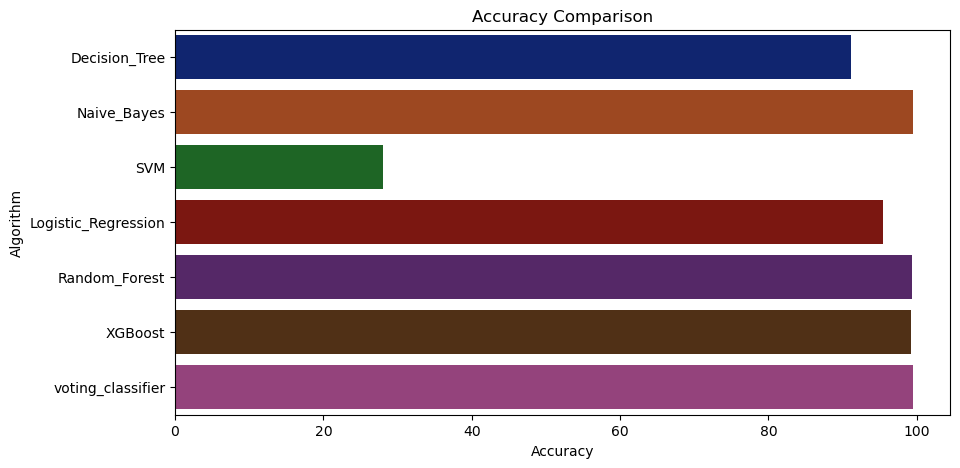

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = Accuracy, y = model, palette = 'dark')

accuracy_models = dict(zip(model, Accuracy))

for k, v in accuracy_models.items():
    print (k, '-->', v)

## **4.PREDICTION**

In [ ]:
max_accuracy = max(Accuracy)

for k, v in accuracy_models.items():
    if v == max_accuracy:
       most_Accurate_modelName = k

modelPath = f'./models/{most_Accurate_modelName}.joblib'

most_Accurate_model = joblib.load(f'./models/{most_Accurate_modelName}.joblib')

# Define the environmental conditions for prediction
N = 100
P = 5
K = 32
temperature	= 26.603016
humidity = 65.3
ph = 4.7
rainfall = 120.91
Total_Nutrients	= 137
Temperature_Humidity = 70	
Log_Rainfall = 6

# Create the optimum Dataframe which my models are trained with
data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

# Make predictions using the trained model
prediction = label_encodings[label_encodings['Label_Encoded'] == most_Accurate_model.predict(data)[0]]['Label'].values[0]

# Print the predicted crops
print("Predicted crops:", prediction)

Predicted crops: tomatoes


c:\Users\Acer\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
